In [1]:
import polars as pl
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
def plot_data(input_df, which_plot: dict):
    plt.figure(figsize=(10, 6))
    if(which_plot["Irms"] == True):
        plt.plot(input_df['unix_ts'], input_df['Irms'], label='RMS Current (A)')
    if(which_plot["pf"] == True):
        plt.plot(input_df['unix_ts'], input_df['I'], label='Power factor')
    if(which_plot["P"] == True):
        plt.plot(input_df['unix_ts'], input_df['P'], label='Power (Watt)')
    if(which_plot["Q"] == True):
        plt.plot(input_df['unix_ts'], input_df['Q'], label='Reactive Power Q (VAR)')
    if(which_plot["S"] == True):
        plt.plot(input_df['unix_ts'], input_df['S'], label='Apparent Power S (...)')
    plt.xlabel('Unix Timestamp')
    plt.ylabel('Values')
    plt.title(f'{which_plot["name"]}')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_device_data(device_name, start, end, df: pl.DataFrame):
    input_df = None
    if (start is None) or (end is None):
        input_df = df
    else:
        input_df = df[start:end]
    plot_data(input_df=input_df, which_plot={
        "name": device_name,
        "Irms": False,
        "pf": False,
        "P": True,
        "Q": False,
        "S": False
    })

__Clothes dryer plot__

In [3]:
base_path = "/opt/nilm-shared-data/nilm_device_detection/other_dataset/RAE_dataset/transform_data/raw"

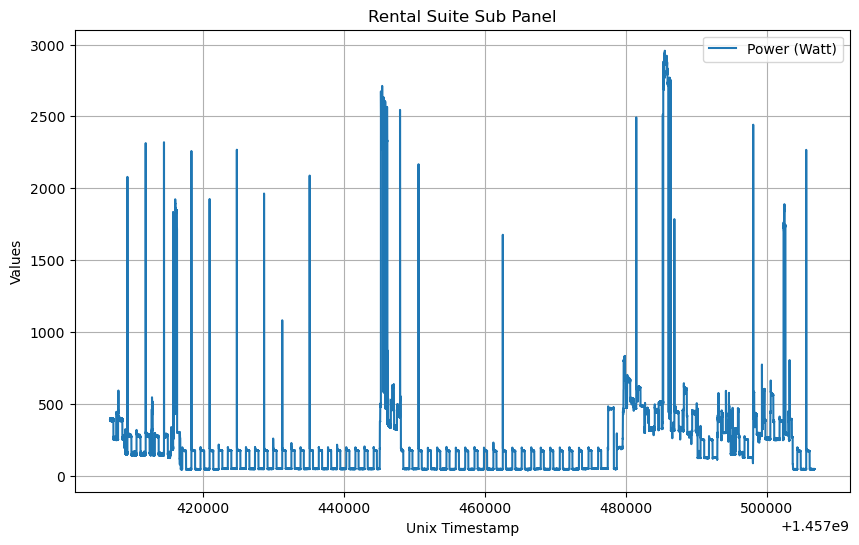

In [12]:
h1_clothes_dryer = pl.read_csv(f"{base_path}/house1_rental_suite_sub_panel.csv")
plot_device_data("Rental Suite Sub Panel", start=100000, end=200000, df=h1_clothes_dryer)

__Heat pump plot__

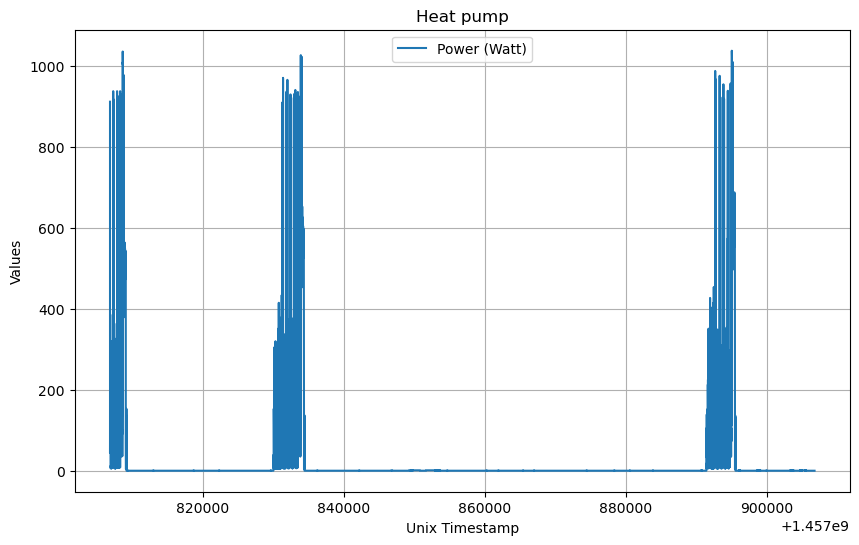

In [27]:
h1_heat_pump = pl.read_csv(f"{base_path}/house1_clothes_washer.csv")
plot_device_data("Heat pump", start=500000, end=600000, df=h1_heat_pump)

In [ ]:
h1_heat_pump[0:10000]

# Bedroom Plug

In [5]:
base_path = "/opt/nilm-shared-data/nilm_device_detection/other_dataset/RAE_dataset/transform_data/raw"

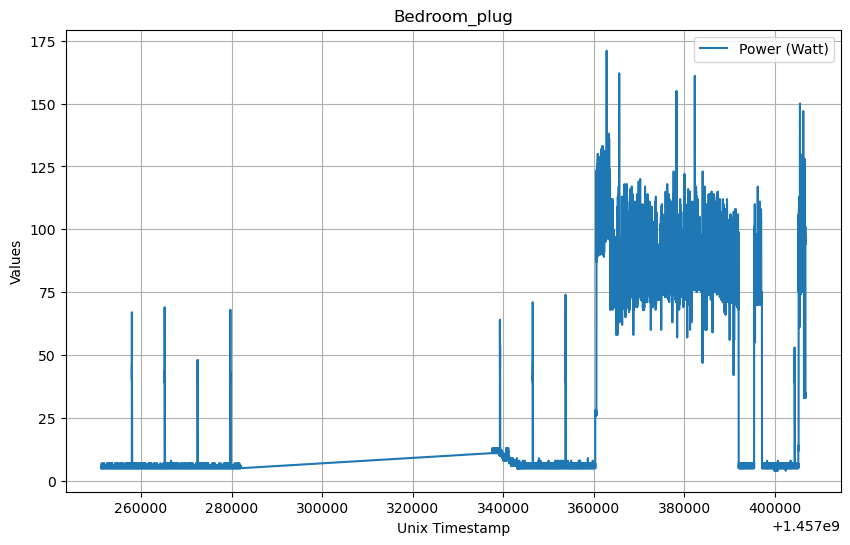

In [6]:
h1_bedroom_plug = pl.read_csv(f"{base_path}/house1_upstairs_bedroom_AFCI_arc-fault_plugs.csv")
plot_device_data("Bedroom_plug", start=0, end=100000, df=h1_bedroom_plug)

# Furniture and Hot water unit

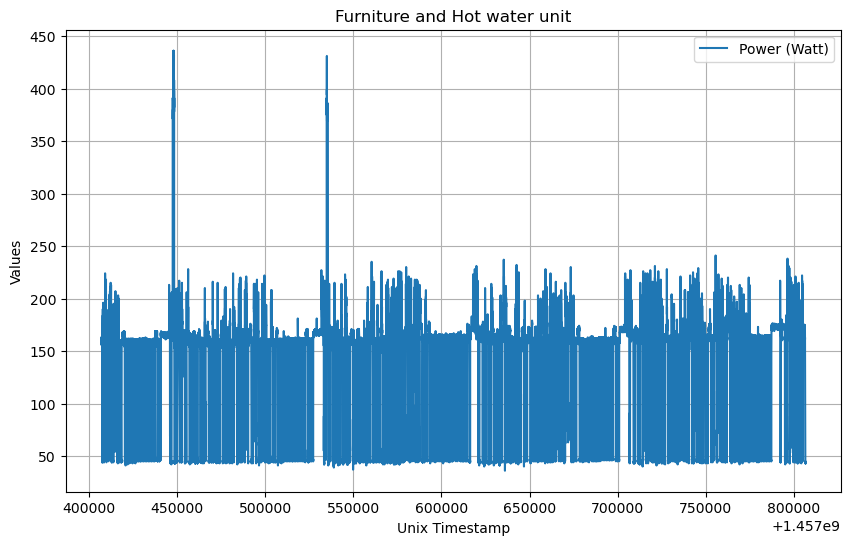

In [31]:
h1_furniture = pl.read_csv(f"{base_path}/house1_furnace_and_hot_water_unit.csv")
plot_device_data("Furniture and Hot water unit", start=100000, end=500000, df=h1_furniture)